# Описание проекта 

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.
Для начала необходимо подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

Доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

# Описание данных


Файл moscow_places.csv:
- name — название заведения;
- address — адрес заведения;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- lat — широта географической точки, в которой находится заведение;
- lng — долгота географической точки, в которой находится заведение;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: «Средний счёт: 1000–1500 ₽»; «Цена чашки капучино: 130–220 ₽»; «Цена бокала пива: 400–600 ₽». и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:


Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся   с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым
1 — заведение является сетевым
- district — административный район, в котором находится заведение, например Центральный административный округ;
- seats — количество посадочных мест.

# Презентация проекта

[Презентация](https://drive.google.com/file/d/1iPd8YHXmo9O97EkFeWy89tT3Y3NhOTXr/view?usp=sharing)

# 1. Загрузка данных и изучение общей информации

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
import numpy as np    
from scipy import stats as st
import seaborn as sns
import math as mth
import plotly.express as px
from plotly import graph_objects as go
import folium
from folium import Map, Marker
# импортируем кластер
from folium.plugins import MarkerCluster
# импортируем карту и хороплет
from folium import Map, Choropleth
# подключаем модуль для работы с JSON-форматом
import json


In [66]:
data = pd.read_csv('/datasets/moscow_places.csv')
display(data.head(20))

data.info()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,0,NaN
6,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,Средний счёт:199 ₽,199.0,NaN,0,45.0
7,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,Средний счёт:200–300 ₽,250.0,NaN,0,45.0
8,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,Средний счёт:от 500 ₽,500.0,NaN,0,79.0
9,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,0,65.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [67]:
# посмотрим ифнормацию относительно посадочных мест (среднее количество и максимум и минимум) для определения разброса относительного среднего
data['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

In [68]:
# посмотрим количество уникальных названий заведений, представленных в датасете
print('Количество заведений в таблице', data['name'].nunique())

Количество заведений в таблице 5614


In [69]:
# приведем к нижнему регистру данные в столбцах датафрейма data
data['name'] = data['name'].str.lower()
data['address'] = data['address'].str.lower()
#data['district'] = data['district'].str.lower()
data['avg_bill'] = data['avg_bill'].str.lower()
display(data.head(30))

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,средний счёт:400–600 ₽,500.0,NaN,1,148.0
5,sergio pizza,пиццерия,"москва, ижорская улица, вл8б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,0,NaN
6,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,средний счёт:199 ₽,199.0,NaN,0,45.0
7,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,средний счёт:200–300 ₽,250.0,NaN,0,45.0
8,donna maria,ресторан,"москва, дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,средний счёт:от 500 ₽,500.0,NaN,0,79.0
9,готика,кафе,"москва, ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,средний счёт:1000–1200 ₽,1100.0,NaN,0,65.0


In [70]:
# посмотрим сколько направлений заведений представлено в фрейме
data['category'].value_counts()


кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Вывод: В представденной таблице 8 406 строк. При этом, представлено 5614 уникальных названий заведений. Типы данных в столбцах отображены корректно, наибольшая категррия заведений представлена кафе - 2378, дале идут рестораны - 2043 и кофейни - 1413. Привели значения в столбцах фрейма к нижнему регистру.

# 2. Предообработка данных

In [71]:
# поиск явных дубликатов
data.duplicated().sum()

0

In [72]:
# посмотрим количество пропусков 
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

In [73]:
#находим долю пропусков  в каждом столбце
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing.round())

name                  0.0
category              0.0
address               0.0
district              0.0
hours                 6.0
lat                   0.0
lng                   0.0
rating                0.0
price                61.0
avg_bill             55.0
middle_avg_bill      63.0
middle_coffee_cup    94.0
chain                 0.0
seats                43.0
dtype: float64


In [74]:
# попробуем понять каким образом в столбце middle формируются данные.
data_bill = data.groupby('avg_bill')['middle_avg_bill'].unique()
print(data_bill)
 

avg_bill
средний счёт:100 ₽               [100.0]
средний счёт:1000 ₽             [1000.0]
средний счёт:1000–10000 ₽       [5500.0]
средний счёт:1000–1100 ₽        [1050.0]
средний счёт:1000–1200 ₽        [1100.0]
                                  ...   
цена чашки капучино:от 270 ₽       [nan]
цена чашки капучино:от 300 ₽       [nan]
цена чашки капучино:от 60 ₽        [nan]
цена чашки капучино:от 89 ₽        [nan]
цена чашки капучино:от 90 ₽        [nan]
Name: middle_avg_bill, Length: 897, dtype: object


Явные дубликаты в таблице отсутствуют, есть большое количесство пропусков в столбцах: price, avg_bill, middle_avg_bill, middle_coffe_cup, Удалить пропуски нельязя, так как и доля слишком большая в общем объеме данных. Заменить пропуски, к примеру на медианное значение привязавшись к названию заведений,не корректно, так как возможно , так как одно и тоже заведение, расположеннное в разных районах отличается колисетвом посадочныи мест и следовательно значением среднего чека, поэтому пока оставим пропуски.

In [75]:
# явных дубликатов нет, но возможно присутствуют неявные дубликаты (дубликаты в названиях) , посмотрим есть ли повторы в названиях заведений
data['name'].value_counts().head(50)

кафе                                   189
шоколадница                            120
домино'с пицца                          77
додо пицца                              74
one price coffee                        72
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
шаурма                                  43
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
ресторан                                34
cofefest                                32
буханка                                 32
столовая                                28
му-му                                   27
drive café                              24
кофемания                               23
крошка картошка                         22
андерсон                                22
скалка     

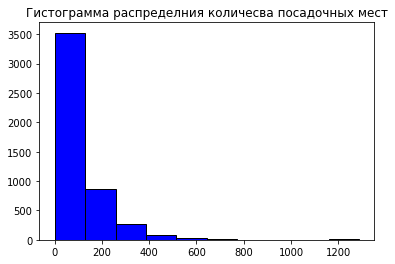

In [76]:
# посмотрим распределение посадочных мест
plt.hist(data['seats'], color = 'blue', edgecolor = 'black')

plt.title('Гистограмма распределния количесва посадочных мест')

plt.show()

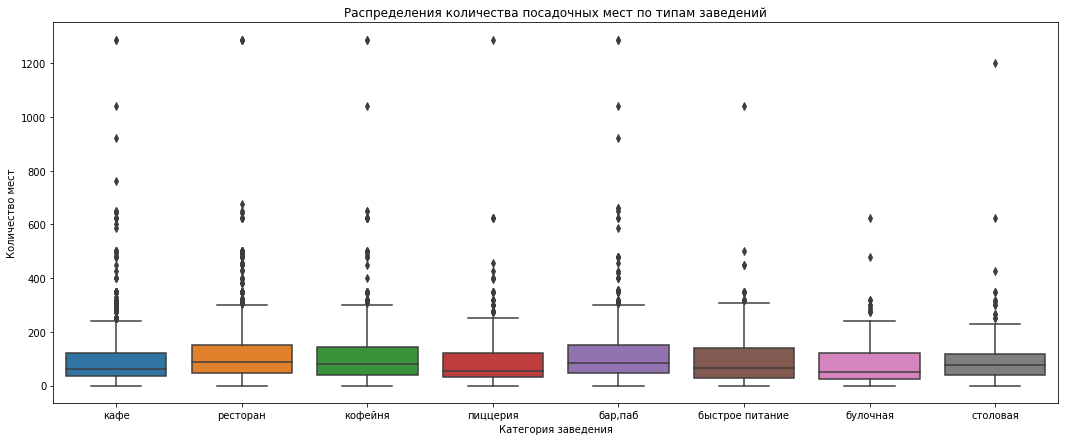

In [77]:
# посмотрим выбросы по диаграмме размаха  в разрезе заведений
plt.figure(figsize = (18,7))
sns.boxplot(data = data,x= 'category', y = 'seats')
plt.title('Распределения количества посадочных мест по типам заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Количество мест')
plt.show()

Вывод: по графикам видно, что присутствуют выбросы, возможно присутсвует влияние человеческого фактора,некорректное занесение данных в таблицу. Стоит определить какое колиссетво заведений в таблице  имеет колисетво посадочных аест больше 700. В случае, если значение несущественное, стоит исключить данные заведения изщ списка. 

In [78]:
# посмотрим какое количество заведений имеет количество посадочных мест больше 700
data_seats = data[data['seats'] > 700]


data = data.query('index not in @data_seats.index')
display('Заведения с числом мест больше 700:', data[data['seats'] > 700]['name'].count())

# есть смысл убрать выбросы, то есть удалить из таблицы заведения с количеством посадочных мест больше 700
#data = data[data['seats'] < 700]

# проверяем ушли ли аномалии
#print('Количество заведений с числом мест больше 700:', data[data['seats'] > 700]['name'].count())

data.info()

'Заведения с числом мест больше 700:'

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8387 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8387 non-null   object 
 1   category           8387 non-null   object 
 2   address            8387 non-null   object 
 3   district           8387 non-null   object 
 4   hours              7856 non-null   object 
 5   lat                8387 non-null   float64
 6   lng                8387 non-null   float64
 7   rating             8387 non-null   float64
 8   price              3310 non-null   object 
 9   avg_bill           3811 non-null   object 
 10  middle_avg_bill    3144 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8387 non-null   int64  
 13  seats              4776 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 982.9+ KB


In [79]:
# сосздаем столбец street, используя переменную new

new = data['address'].str.split(", ", n = 2, expand = True)
data['street'] = new[1]

display(data.head(20))

data.isna().sum()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица
5,sergio pizza,пиццерия,"москва, ижорская улица, вл8б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,0,NaN,ижорская улица
6,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,средний счёт:199 ₽,199.0,NaN,0,45.0,клязьминская улица
7,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,средний счёт:200–300 ₽,250.0,NaN,0,45.0,клязьминская улица
8,donna maria,ресторан,"москва, дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,средний счёт:от 500 ₽,500.0,NaN,0,79.0,дмитровское шоссе
9,готика,кафе,"москва, ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,средний счёт:1000–1200 ₽,1100.0,NaN,0,65.0,ангарская улица


name                    0
category                0
address                 0
district                0
hours                 531
lat                     0
lng                     0
rating                  0
price                5077
avg_bill             4576
middle_avg_bill      5243
middle_coffee_cup    7852
chain                   0
seats                3611
street                  0
dtype: int64

```python
data['address'].str.split(', ').str[1]
```

In [80]:
# создадим столбец 24/7  в котором будут отражаться True или FAlse  в случаее наличия заданы слов
data['is_24/7'] = data['hours'].str.contains('ежедневно, круглосуточно')
display(data.head(5))

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица,False


Вывод: 
- как явные дубликаты, так и не явные в таблице не найдены
- обнаружено большое количество пропусков в столбцах, убрать пропуски не можем, чтобы не исказить данные
- убрали 17 объектов, которые имели аномально большое количество посадочных мест(более 700)
- добавилаи столбец street с названием улиц из столбца address
- добавили столбец 24/7, в котором указано значение True в том случае, если заведение работает ежедневно и круглосуточно и False впротивном случае

# 3. Анализ данных

1. определение категорий заведений. Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям

In [81]:
category_name = data.groupby('category')['name'].count().reset_index()
display(category_name)

,category,name
0,"бар,паб",761
1,булочная,256
2,быстрое питание,602
3,кафе,2373
4,кофейня,1410
5,пиццерия,632
6,ресторан,2039
7,столовая,314


In [82]:
import plotly.express as px
from plotly import graph_objects as go 

fig = go.Figure(data=[go.Pie(labels=category_name['category'], values=category_name['name'])])
fig.layout=go.Layout(title=go.layout.Title(text="Категории заведений в долях"))
fig.show()

In [83]:
fig = px.bar(category_name, 
             x='category', 
             y='name', 
             text = 'name',
             title='Объекты общественного питания по видам'
            )
fig.update_layout(xaxis_title='Категории заведений',
                  yaxis_title='Количество заведений')
fig.show() 

Вывод: исследование показало, что в большей степени рынок общепита Москвы представлен имеено кафе - более 28% заведений, далее идут рестораны с долей более 25% и кофейни с долей более 16%. Самыми немногочисленными направлениями являются -булочные и столовые с долей около 3,5%. 

2 .Исследование количества посадочных мест в местах по категориям используя медианное и средние значение

In [84]:
display(data.groupby('category')['seats'].describe())
mean_s = data.groupby('category')['seats'].median().reset_index().sort_values(by = 'seats', ascending = False)
display(mean_s)


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",464.0,115.829741,110.045519,0.0,48.00,81.0,143.75,660.0
булочная,148.0,89.385135,97.685844,0.0,25.00,50.0,120.00,625.0
быстрое питание,348.0,96.186782,94.016352,0.0,27.25,65.0,136.25,500.0
кафе,1213.0,93.548228,99.851302,0.0,35.00,60.0,116.00,650.0
кофейня,748.0,106.811497,107.360198,0.0,40.00,80.0,144.00,650.0
пиццерия,426.0,91.694836,96.320059,0.0,30.00,53.5,120.00,625.0
ресторан,1266.0,118.259874,105.125257,0.0,48.00,86.0,150.00,675.0
столовая,163.0,93.000000,87.704048,0.0,40.00,75.0,116.00,625.0


,category,seats
6,ресторан,86.0
0,"бар,паб",81.0
4,кофейня,80.0
7,столовая,75.0
2,быстрое питание,65.0
3,кафе,60.0
5,пиццерия,53.5
1,булочная,50.0


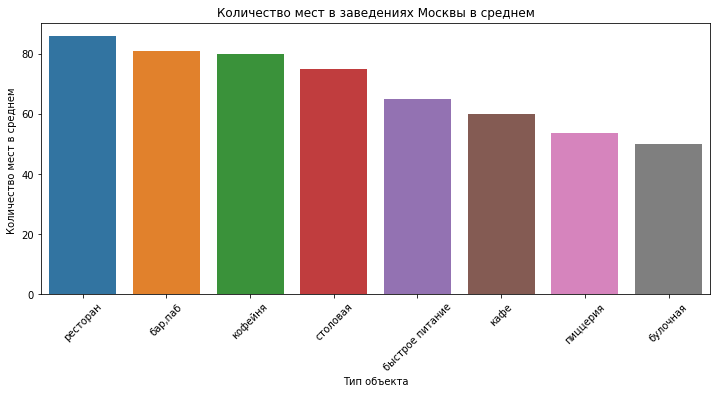

In [85]:
import seaborn as sns
from numpy import median

plt.figure(figsize = (12,5))
ax = sns.barplot(x='category', y='seats', data=mean_s) 

ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест в среднем ')
ax.set_title('Количество мест в заведениях Москвы в среднем')
plt.xticks(rotation=45)
plt.show()

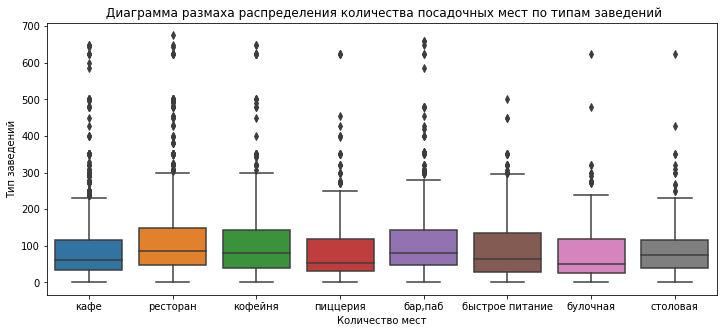

In [86]:
# построим диаграмму размаха
plt.figure(figsize = (12,5))
ax = sns.boxplot(x='category', y='seats', data=data)
plt.title(' Диаграмма размаха распределения количества посадочных мест по типам заведений')
plt.xlabel('Количество мест')
plt.ylabel('Тип заведений')
plt.show()

Вывод: из полученных графиков видно, что самое большое количество посадочных мест находится именно в ресторанах , далее располагаются пабы и кофейни. По графику размаха видно, что в заведениях категории быстрого питания также присутсвуют немало заведений с количеством посадочных мест уровня ресторана, несмотря на то, что медианное значение посадочных аесь в данной категориии находится на уровне 65. Выявленный результат очивиден, так как, как правило рестораны, крупные пабы и заведения быстрого питания ориентированы на большое количество поситителей, скорее всего имеют большие площади залов, чем у кофейнь. 

3.Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?

In [87]:
# посмотрим количество сетевых и несетевых заведений 
name_chain = data['chain'].value_counts().reset_index()
name_chain.columns = ['chain', 'count']
display(name_chain)

,chain,count
0,0,5191
1,1,3196


In [88]:
# визуализируем полученные данные с помощью круговой диаграммы
fig = go.Figure(data=[go.Pie(labels=['сетевые','несетевые'], values=name_chain['count'])])
fig.layout=go.Layout(title=go.layout.Title(text="Категории заведений по принципу 'сетевое' 'несетевое' в долях"))
fig.show()

Вывод: по диаграмме видно, что большинство заведений Москвы явялются несетевыми - это около 62%. Около 38% заведений относятся к сетевым.

 4. Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.

In [89]:
# создадим таблицу, в которой сгруппируем данные по категории заведений, принадлежости к сети и посчитаем их количество

data_category_chain = data.groupby(['category','chain'])['name'].count().reset_index()

display(data_category_chain)

,category,chain,name
0,"бар,паб",0,592
1,"бар,паб",1,169
2,булочная,0,99
3,булочная,1,157
4,быстрое питание,0,371
5,быстрое питание,1,231
6,кафе,0,1596
7,кафе,1,777
8,кофейня,0,692
9,кофейня,1,718


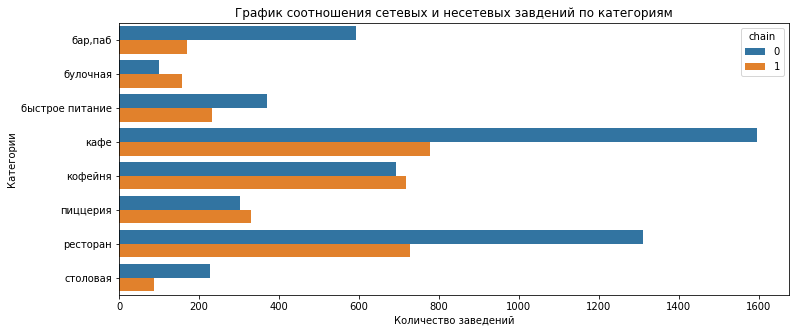

In [90]:
plt.figure(figsize=(12, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='name', y='category', data=data_category_chain, hue='chain')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График соотношения сетевых и несетевых завдений по категориям')
plt.xlabel('Количество заведений')
plt.ylabel('Категории')

# отображаем график на экране
plt.show()

Вывод: по графику видно, что среди самых популярных заведений Москвы, среди ресторанов и кафе, большую долю занимают именно несетевые заведения. Однако, если мы рассматриваем, к примеру, заведения быстрого питания и булочные, то в данном случае доля сетей превышвет. Это говорит о том, что:
1. Открытие ресторана либо полноценного кафе более затратное направление, чем открытие булочной или бюджетного общепита или кофейни. При этом, бюджетные заведения в сетевом формате имеют большую маржинальность за счет распеделения объемов и затрат. 
2. Ресторан, как правило ориентирован на более высокий сегмент потребителей, претендует на уникальность кухни, уникальность бренда и другие элементы индивидуальности.
3. Рестораны и кафе, как правило имеют большее сосредоточение именно в центре города и ближайшие окраины, бюджеьные сетевые заведения могут быть расположени не только в центре, но и на окраинах, так как везде будет иметь свой сегмент потребителей.

5. Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?

In [91]:
# выборка сетевых заведегий и их группировка на названию заведений 
data_chain= data[data['chain'] ==1]
top_15 = data_chain.groupby('name').agg({'rating': 'median', 'category':'count'}).reset_index().sort_values(by = 'category', ascending = False).head(15)
top_15 = top_15.rename(columns={'category':'count'})

print(top_15)


                                    name  rating  count
729                          шоколадница    4.20    119
335                       домино'с пицца    4.20     76
331                           додо пицца    4.30     74
146                     one price coffee    4.20     70
742                         яндекс лавка    4.00     68
58                                 cofix    4.10     65
168                                prime    4.20     50
664                           хинкальная    4.40     44
409                             кофепорт    4.20     42
418  кулинарная лавка братьев караваевых    4.40     39
628                              теремок    4.10     38
683                              чайхана    4.10     37
39                              cofefest    4.05     32
267                              буханка    4.40     32
477                                му-му    4.30     27


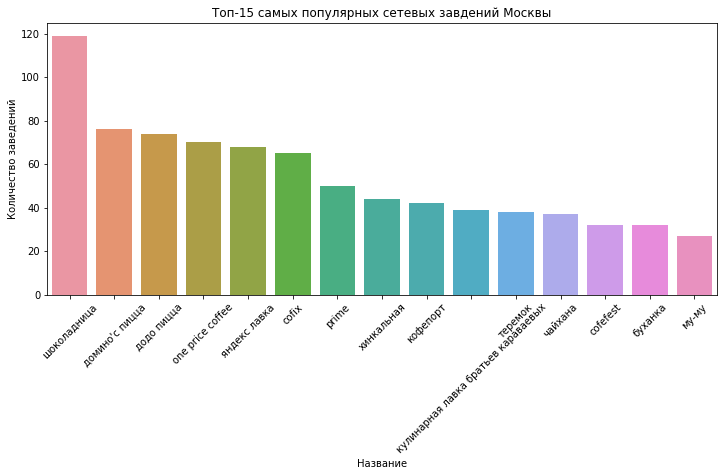

In [92]:
# построим визуализацию полученных данных с помощью столбчатой диаграммы
plt.figure(figsize=(12, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='name', y='count', data=top_15)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Топ-15 самых популярных сетевых завдений Москвы')
plt.xlabel('Название')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)

# отображаем график на экране
plt.show()

In [93]:
# альтернативный подход
rating_category_new = data.groupby('category').agg({'rating' : 'mean'}).round(2).sort_values('rating', ascending = False).reset_index()
fig = px.bar(rating_category_new, # загружаем данные и заново их сортируем
             x='rating', # указываем столбец с данными для оси X
             y='category', # указываем столбец с данными для оси Y
             text='rating', # добавляем аргумент, который отобразит текст с информацией
             color='category'                   
            )
# оформляем график
fig.update_layout(title='Распределение среднtuj рейтинга по категориям заведений',
                   xaxis_title='Рейтинг',
                   yaxis_title='Название категорий')
fig.update_xaxes(range=[4, 4.5])
fig.show() # выводим график

Вывод:среди топ-15 сетевых заведений первое место занимает известная сеть кофеин "Шоколадница" - 119 заведений по Москве, следом идут известные сетевые пицерии и булочные, заведения общественного питания. Рейтинг 15-ти самых популярных сетей замыкает ресторан быстрого питания " Му-Му". 
Что общего у данных заведений:
- все заведения являются сетевыми
- все заведения не относятся к сегмеету рестораны, что подтверждает результаты исследования о том, что в большинстве своем рестораны не являются сетевыми
- каждое сетевое  заведение и топ-15 имеет достаточно приличный рейтинг - более 4.1, что говорит о том, что посетители лояльны к данным заведениям и это в том числе позоляет увеличивать количество точек по Москве, масштабироваться

6. Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [94]:
# количество уникальных заведений в фрейме
data_count_cat = data.groupby('name')['category'].count().sort_values(ascending= False).reset_index()
data_count_n = data['name'].nunique()
print(data_count_n)
display(data_count_cat)

5502


,name,category
0,кафе,189
1,шоколадница,119
2,домино'с пицца,77
3,додо пицца,74
4,one price coffee,71
...,...,...
5497,гараж гриль & кофе тайм,1
5498,гао,1
5499,ганс и марта,1
5500,гандзак,1


In [95]:
# посмтрим какое количсетво заведений и как они распределены по районам Москвы в разрезе сегментов
district_name = data.groupby(['district', 'category']).agg({'address' : 'count'}) \
.sort_values(by = 'address',ascending = False).reset_index()
display(district_name)

,district,category,address
0,Центральный административный округ,ресторан,670
1,Центральный административный округ,кафе,464
2,Центральный административный округ,кофейня,428
3,Центральный административный округ,"бар,паб",364
4,Юго-Восточный административный округ,кафе,282
...,...,...,...
67,Северо-Западный административный округ,"бар,паб",23
68,Северо-Западный административный округ,столовая,18
69,Юго-Западный административный округ,столовая,17
70,Юго-Восточный административный округ,булочная,13


In [96]:
# построим визуализацию полученных данных с помощью столбчатой диаграммы
fig = px.bar(district_name, 
             x='address', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y  
             color='category'
            )
# оформляем график
fig.update_layout(title='Количество заведений каждой категории по районам',
                   xaxis_title='Количество заведений',
                   yaxis_title='Название района',
                   
                 )
fig.show() # выводим график

Вывод: в таблице присутсвует всего 5 502 заведения. В датасете представдены 9 районов Москвы. Центральный район в большей степени представлен ресторанами (670), далее идут кафе (464) и кофейни (428) и пабы. В остальных райнох в большей степени присутствуют кафе.Больше всего заведений располржено именно в центре Москвы, а меньше всего в северо-западном административном округе.
    По графику отчетливо видно, что центр Москвы представлен заведениями более высокого сегмента - ресторанами, в округах большую долю занимают более низкие сегменты, скорее всего с более низким средним чеком.



7. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

In [97]:
# найдем усредненный рейтинг каждой категории
category_rating = data.groupby('category').agg({'rating': 'mean'}).sort_values('rating', ascending = False).reset_index()
display(category_rating)

,category,rating
0,"бар,паб",4.387911
1,пиццерия,4.300475
2,ресторан,4.290436
3,кофейня,4.277376
4,булочная,4.268359
5,столовая,4.211465
6,кафе,4.123557
7,быстрое питание,4.049834


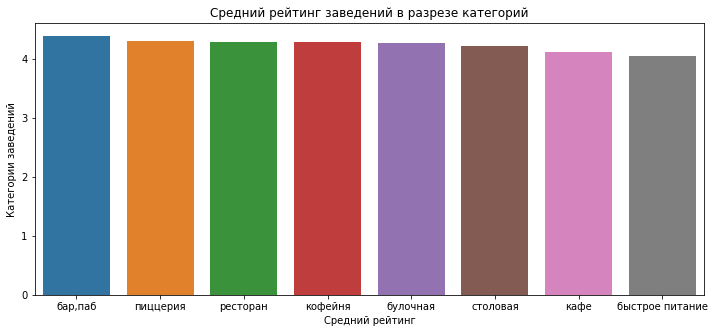

In [98]:
# построим визуализацию полученных данных с помощью столбчатой диаграммы
plt.figure(figsize=(12, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='category', y='rating', data=category_rating)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Средний рейтинг заведений в разрезе категорий')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категории заведений')
#plt.xticks(rotation=45)

# отображаем график на экране
plt.show()

Вывод: из графика видно, что самый большой средний рейтинг у заведений категории паб и бар -4.39, далее уидут пицерии -4.3, рестораны -4.29. Самый маленький рейтинг в категории быстрого питания - 4.09. В целом , по каждому сегменту средний рейтинг превышает 4.

8. Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете

In [99]:
cat_rating_address = data.groupby('district', as_index=False)['rating'].agg('mean')
display(cat_rating_address)

,district,rating
0,Восточный административный округ,4.173392
1,Западный административный округ,4.179450
2,Северный административный округ,4.239778
3,Северо-Восточный административный округ,4.148260
4,Северо-Западный административный округ,4.208802
5,Центральный административный округ,4.377520
6,Юго-Восточный административный округ,4.101120
7,Юго-Западный административный округ,4.172920
8,Южный административный округ,4.184417


In [100]:

# читаем файл и сохраняем в переменной
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)


In [102]:

# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=cat_rating_address,
    columns=['district', 'rating'],
    key_on='feature.name',
    #fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

Вывод: из таблицы средних значений рейтингов в разрезе сегментов по регионам, а также из визцализации видно, что По данным видно, что самый высокий рейтинг в заведениях в Центральном административном округе - 4.38. Самый низкий в Юго-Восточном административном округе - 4.1.

9. Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [ ]:
# импортируем карту и маркер
from folium import Map, Marker
# импортируем кластер
from folium.plugins import MarkerCluster

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m

Вывод: псоле того, как мы объединили все заведения в кластеры, видно, что основная масса заведений находится именно в центре Москвы, самым малочисленным округом является Юг Москвы.

10.Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [107]:
# находит топ-15 улиц по количеству заведений.
street_name = data.groupby('street')['category'].count().reset_index().sort_values('category', ascending = False).head(15)
display(street_name)
# находим распределение заведений по улицам в разрезе категорий
street_name_cat = data.groupby(['street', 'category'])['name'].count().reset_index()
street_name_cat = street_name_cat.sort_values('name', ascending= False)
display(street_name_cat)

,street,category
837,проспект мира,184
841,профсоюзная улица,122
533,ленинский проспект,107
834,проспект вернадского,97
531,ленинградский проспект,95
379,дмитровское шоссе,88
461,каширское шоссе,77
304,варшавское шоссе,76
532,ленинградское шоссе,70
610,мкад,65


,street,category,name
2136,проспект мира,кафе,53
1519,мкад,кафе,45
2139,проспект мира,ресторан,45
2137,проспект мира,кофейня,36
2148,профсоюзная улица,кафе,35
...,...,...,...
1535,молодёжная улица,кофейня,1
1537,монтажная улица,кофейня,1
1538,монтажная улица,ресторан,1
1539,москворецкая набережная,кофейня,1


In [108]:
# для визцализации оставим в таблице street_name_cat только улицы - bз списка топ-15.
street_name_cat_15 = street_name_cat[street_name_cat['street'].isin(street_name['street'])]
display(street_name_cat_15)

,street,category,name
2136,проспект мира,кафе,53
1519,мкад,кафе,45
2139,проспект мира,ресторан,45
2137,проспект мира,кофейня,36
2148,профсоюзная улица,кафе,35
...,...,...,...
2119,проспект вернадского,булочная,1
1382,люблинская улица,пиццерия,1
1264,кутузовский проспект,булочная,1
1517,мкад,"бар,паб",1


In [109]:
fig = px.bar(street_name_cat_15, # загружаем данные и заново их сортируем
             x='name', # указываем столбец с данными для оси X
             y='street', # указываем столбец с данными для оси Y
             color='category'
            )
# оформляем график
fig.update_layout(title='Количество заведений каждой категории в разрезе улиц',
                   xaxis_title='Количество заведений',
                   yaxis_title='Название улиц',
                   
                 )
fig.show() # выводим график

Вывод: из графика видно, что топ-15 улиц по количеству заведений возглавляет - Проспект Мира, среди заведений большую долю занимают рестораны и кафе.
    

11.Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

In [110]:
one_rest = data['street'].value_counts().reset_index()
one_rest.columns = ['street', 'count']
one_rest = one_rest[one_rest['count'] ==1]
display(one_rest)

,street,count
990,кутузовский проезд,1
991,1-й щипковский переулок,1
992,улица стасовой,1
993,промышленный проезд,1
994,большой строченовский переулок,1
...,...,...
1442,гаврикова улица,1
1443,улица генерала дорохова,1
1444,большой волоколамский проезд,1
1445,2-я фрезерная улица,1


In [111]:
# проверим как все заведения распределены между сегментами
street_name_new = data.groupby(['street','category'])['name'].count().reset_index().sort_values('name', ascending = False)

one_rest_cat = street_name_new[street_name_new['street'].isin(one_rest['street'])]
one_rest_cat = one_rest_cat.groupby('category')['street'].count()
display(street_name_new)
print(one_rest_cat)

,street,category,name
2136,проспект мира,кафе,53
1519,мкад,кафе,45
2139,проспект мира,ресторан,45
2137,проспект мира,кофейня,36
2148,профсоюзная улица,кафе,35
...,...,...,...
1535,молодёжная улица,кофейня,1
1537,монтажная улица,кофейня,1
1538,монтажная улица,ресторан,1
1539,москворецкая набережная,кофейня,1


category
бар,паб             39
булочная             8
быстрое питание     23
кафе               159
кофейня             84
пиццерия            15
ресторан            93
столовая            36
Name: street, dtype: int64


Вывод: из представленных данных было определено, что в таблице представлено 457 улиц а которых расположено лишь одно заведение, далее данные заведения были распределены по сегментам среди которых, 159 заведений -кафе, 84 относятся к сегменты кофейня, 93 заведения - рестораны, и.т.д. 

12. Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. 

In [112]:
# найдем средний чек для заведений в каждом районе
mid_avg_bill = data.groupby('district')['middle_avg_bill'].median().sort_values(ascending= False).reset_index()
display(mid_avg_bill)

,district,middle_avg_bill
0,Западный административный округ,1000.0
1,Центральный административный округ,1000.0
2,Северо-Западный административный округ,700.0
3,Северный административный округ,650.0
4,Юго-Западный административный округ,600.0
5,Восточный административный округ,550.0
6,Северо-Восточный административный округ,500.0
7,Южный административный округ,500.0
8,Юго-Восточный административный округ,450.0


In [ ]:
# строим фоновую картограмму на основе новой таблице медианного значения по районам
# создаём карту Москвы
m_1 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=mid_avg_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='Purples',
    #fill_opacity=0.8,
    legend_name='Медианное значение среднего чека по районам Москвы',
).add_to(m_1)

# выводим карту
m_1

Вывод:данный анализ показал, что самый высокий средний чек определен в заведениях центрального и западного округов - 1000, самое низкое медианное значение среднего чека - в юго-восточном административном округе - 450, это более чем в 2 раза ниже чем в центре или на западе Москвы. Средний чек по остальным районам в среднем отличсется примерно в 1,5-2 раза от центра и запада.

# Основной вывод по проекту

По результатам проведенног анализа было выявлено следующее:
- заведения Москвы в большей степени представлены - Кафе 2373 единицы или более 28% от общего числа заведений, на втором месте расположены рестораны - 2039 или около 25%, ментше всего заведений в сегменте -булочные чуть более 3% от общего колисетва 
- самым большим количеством посадочных мест располагают рестораны и кафе, а также заведения быстрого питания. 
- более 60% заведений Моксвы являются несетевыми. Самый большой процент несетевых заведений приходится на рестораны, при этом для булочных, заведений быстрого питания и кофеин в большей степени характерна сеть.
- самым популярным сетевым заведением Моксвы является сеть кофейнь - Шоколадница более 115 завелений, далее идут известные пицерии.
- среди всех заведений, предсавленных в таблице большую далю занимают рестораны и кафе при этом наибольшее их сосредоточение находится в центре Москвы и северо-западном админ. округе.Для Южного и Восточого админ. округа в большей степени характерны заведеняи быстрого питания, кофейни, булочные, т.е. более бюджетные заведения
- в таблице представлено 9 округов, самый насыщенный - центральный и северо-западый. Центральный огруг, в основном наполнен ресторанами, кафе, кофейнями и пабами. Это очевидно, так как центр МОсквы - это исторический центр, бизнес центр, культурынй и шопинг центры и именно там максимальное скопление населения, проживающего в Москве, так и туристического и бизнес потоков.
- анализируя средние рейтинги заведений, важно отметить, что самый выокий рейтинг у пабов и баров более 4,38, далее идут рестораны и кофейни. САмый низкие рейтинги в заведений быстрого питания. При это средние рейтинги разных сегментов имеют очень небольшой разброс между собой и имеют значение не хуже 4.1
- анализируя улицы с точки зрения концентрации заведений, важно отметить, что больше всего заведений находятся в центре города. Максимальная сосредоточенность на Проспекте Мира (основные сегменты кафе и рестораны), 457 улиц из разных районов имеет всего 1 заведение
- анализ среднего чека в разрезе заведений по райнам показал, что саое большое значение среднего чека приходится на заведения, расположенные в центре и в западном адм. округах Москвы -1000. В остальных районах средний чек в 1,5-2 раза ниже вышеуказанных, при эьом, самый низкий средний чек на юге Москвы - 450.

# 4. Детализация исследований открытия кофейни

In [ ]:
data_cafe = data[data['category'] =='кофейня']
data_cafe_1 = data_cafe.groupby('category')['address'].count()
display(data_cafe_1)


In [ ]:
# распределение кофейнь по районам Москвы
data_cafe_dist = data_cafe.groupby(['category','district'])['name'].count().sort_values(ascending = False).reset_index()
display(data_cafe_dist)
plt.figure(figsize=(20, 10))
sns.barplot(x='district',y = 'name', data= data_cafe_dist)
plt.xticks(rotation=45)
plt.title('Распределение кофейнь по районам Москвы')
plt.show()


Вывод: всего в таблице 1410 заведений относится  к сегменту кофейня. Больше всего кофейнь находится в центре Москвы - 428 заведений, меньше всего в северо-западном админ. округе - 62 единицы.

In [ ]:
#display(data_cafe)
#посмотрим расположение кофеен на карте Москвы
m_3 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m_3)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data_cafe.apply(create_clusters, axis=1)

# выводим карту
m_3

In [ ]:
# посмотрим есть ли кофейни, которые работают круглосуточно
print('Количество кофеен, работающих круглосуточно:',data_cafe['is_24/7'].sum())

In [ ]:
#оценим медианный рейтинг кофеен и расположение по районам
display(data_cafe)
data_cafe_rating = data_cafe.groupby('district').agg({'rating':'median'}).sort_values(by = 'rating', ascending = False).reset_index()

display(data_cafe_rating)


In [ ]:
# посмотрим расположение по районам на карте Москвы
from folium import Map, Choropleth

# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
m_4 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=data_cafe_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    #fill_color='YlGn',
    #fill_opacity=0.8,
    legend_name='Средний рейтинг кофеен по районам',
).add_to(m_4)

# выводим карту
m_4

In [ ]:
# посмотрим какова средняя стоимость чашки кофе в кофейнях ориеттир на капучино

print('Стоимость чашки капучино в чреднем по рвйонам Москвы:', data_cafe['middle_coffee_cup'].median().round())


In [ ]:
data_cafe_middle = data_cafe.groupby('district').agg({'middle_coffee_cup':'median'}).sort_values(by = 'middle_coffee_cup', ascending = False).reset_index()
display(data_cafe_middle)

# Общий вывод по детальному исследованию "открытие кофейни"

Вывод:детальное исследование показало, что:
- численность заведений в сегменте кофейня в Москве составляет 1410 единиц (в соответсвие с данными в таблице)
- большинство кофеен расположено в центре Москвы - более 400 заведений, далее идет западный админ. округ - 193 заведения и 9-ку замыкает северо-западный админ. округ - 62 заведения в данном сегменте. Визуализация представлена на карте Москвы в разрезе кластеров
- средние рейтинги кофеен по всем районам Москвы одинаковые - 4.3 , за исключение среднего рейтинга данного сегмента  в северо-западном адм. округе - 4.2
- в среднем чашка капучино стоит около 170 рублей по всем районам Москвы. При этом, самая дорогая чашка капучино приходится на юго-западный район Москвы -198, в центре в средне кашка капучно стоит 190. Самое бюджетное капучино на востоке Москвы - 135.

Опираясь на результаты анализа можно выделить следующие рекоментации для открытия кофейни:
заведение , относящееся к сегменту "кофейня" достаточно популярно в Москве. Считаю. что целесообразно открывать данное заведение в районе с хорошим трафиком. ЭТо может быть район с сосредоточением бизнес центров и офисов , либо спальный район с большой проходимостью. Стоит отметить, что вне зависимости от районов, средний чек для чашки капучино не слишком сильно отличается, скорее всего это связано с тем, что в центре москвы достаточно высокая конкуренция в данном сегменте, поэтому в сегменте масс кофеин лучше всего увеличивать объемы реализации, что опять же говорить в пользу хорошего трафика. Если говорить о времени работы предполагаемого заведения, тут стоит ориетироваться на местоположение. Если заведение находится в центре города, то с большей вероятностью люди будут посещать его круглосуточно, в административных центрах самое популярное время кофепития - утренние часы, поэтому ориентироваться стоит на местоположение, но чтобы захватить практически весь поток клиентов стоит открываться не позже 8 или даже 7:30 утра и закрыться около 23:00. В ценовой политике заведения уместно учитывать концепцию заведения, уровень сервиса, территориальное расположение, платежеспособность потребителей, а также ряд других факторов.
Стать культовым заведением поможет то,что сможет выделить заведение среди тысячи остальных. 
